簇状柱形图，分面，折线图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
sedan_class = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_class)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)  # 强制类型转换，object转换为有序category

In [4]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [13]:
## 处理数据
ct_counts = fuel_econ.groupby(['trans_type', 'VClass']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')

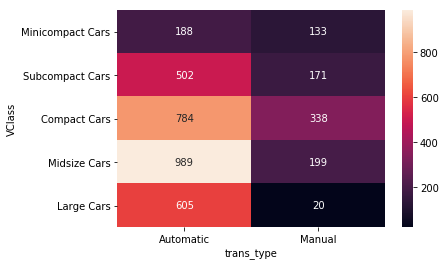

In [14]:
## 绘制热图
sb.heatmap(data=ct_counts, annot=True, fmt='d')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

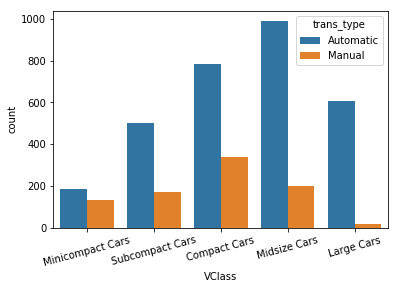

In [15]:
## 绘制簇状柱形图
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15)

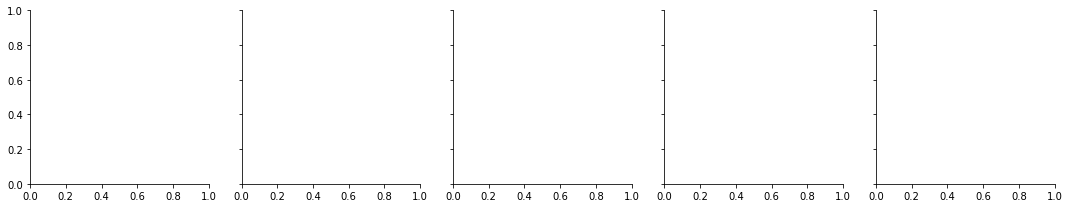

In [16]:
## 分面
g = sb.FacetGrid(data=fuel_econ, col='VClass')

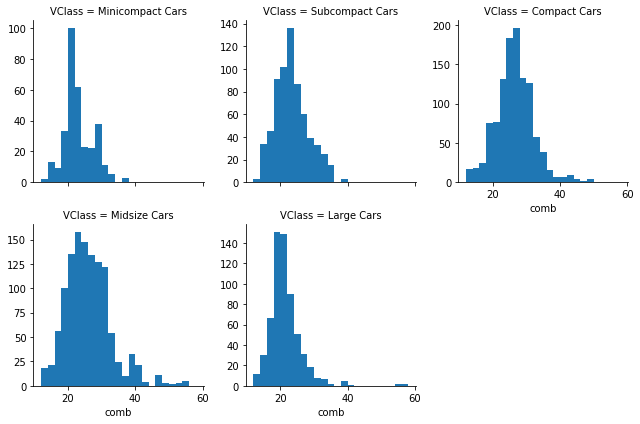

In [19]:
bins = np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False)  ## col_wrap表示最多3列，sharey=False不共享Y轴
g.map(plt.hist, 'comb', bins=bins)  # 直方图

折线图